In [1]:
import geopandas as gpd
print(gpd.__version__)

0.14.3


In [2]:
# 내장 데이터 사용
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_10708\1783259518.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
# 로컬 데이터 사용
states = gpd.read_file('./data/map/ne_110m_admin_1_states_provinces.shp')
states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


In [5]:
# 필요한 컬럼만 선택해서 가져오기 
states[['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(1)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."


In [6]:
states.loc[:, ['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(1)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."


데이터 살펴보기

In [7]:
states.shape # 모양 확인 (행, 열)

(51, 122)

In [8]:
states.columns # 컬럼 확인

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [10]:
states.geom_type.head() # 지오메트리 타입 확인

0         Polygon
1         Polygon
2         Polygon
3    MultiPolygon
4         Polygon
dtype: object

In [11]:
states.crs # 좌표계 확인

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

지도 시각화

In [14]:
states.loc[:, ['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(5)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


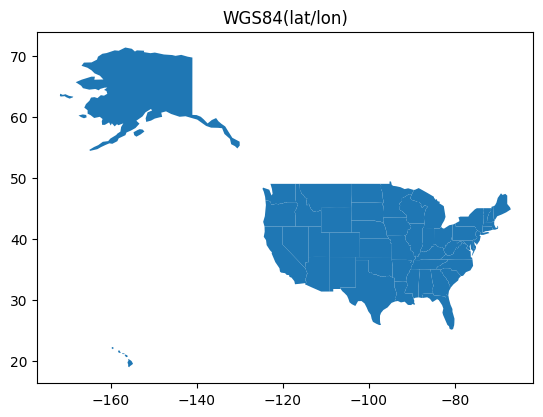

In [12]:
import matplotlib.pyplot as plt

ax = states.plot()
ax.set_title("WGS84(lat/lon)")
plt.show()

파일 내보내기

In [15]:
states.to_file("./data/my_file.json", driver='GeoJSON')

파일 불러오기

In [16]:
df = gpd.read_file("./data/my_file.json")
df.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
